# Introduction

---

This notebook focuses on analyzing Sustainable Development Goal (SDG) Indicator 4.1.1, which measures the proportion of children and young people (a) in grades 2/3; (b) at the end of primary; and (c) at the end of lower secondary achieving at least a minimum proficiency level in (i) reading and (ii) mathematics, by sex 


Author: <br>
Abel Apriliani <br>
SnakeBros<br>

In [18]:
import pandas as pd

In [19]:
data_411 = pd.read_excel("../datasets/4.1.1.xlsx")

In [20]:
data_411.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,Education level,Nature,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,48.97526,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,N,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,47.31352,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_MATH,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,62.31563,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_READ,PERCENT
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,61.21205,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,N,G,BOTHSEX,SKILL_READ,PERCENT
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2001,47.49661,2001,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_MATH,PERCENT


In [21]:
data_411.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               5558 non-null   int64  
 1   Target             5558 non-null   float64
 2   Indicator          5558 non-null   object 
 3   SeriesCode         5558 non-null   object 
 4   SeriesDescription  5558 non-null   object 
 5   GeoAreaCode        5558 non-null   int64  
 6   GeoAreaName        5558 non-null   object 
 7   TimePeriod         5558 non-null   int64  
 8   Value              5558 non-null   float64
 9   Time_Detail        5558 non-null   int64  
 10  TimeCoverage       0 non-null      float64
 11  UpperBound         0 non-null      float64
 12  LowerBound         0 non-null      float64
 13  BasePeriod         0 non-null      float64
 14  Source             5558 non-null   object 
 15  GeoInfoUrl         0 non-null      float64
 16  FootNote           0 non

In [22]:
# check the number of unique values in each column
data_411.nunique()

Goal                    1
Target                  1
Indicator               1
SeriesCode              1
SeriesDescription       1
GeoAreaCode           143
GeoAreaName           143
TimePeriod             23
Value                5182
Time_Detail            23
TimeCoverage            0
UpperBound              0
LowerBound              0
BasePeriod              0
Source                 30
GeoInfoUrl              0
FootNote                0
Education level         3
Nature                  2
Reporting Type          1
Sex                     3
Type of skill           2
Units                   1
dtype: int64

In [23]:
# drop irrelevant columnsS
irrelevant_col = [
    "Goal", "Target", "Indicator", "SeriesCode", "SeriesDescription",
    "TimeCoverage", "UpperBound", "LowerBound", "BasePeriod",
    "GeoInfoUrl", "FootNote", "Nature", "Reporting Type", "Units", "Source"
                  ]
data_411.drop(columns=irrelevant_col, inplace=True)

In [24]:
data_411.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GeoAreaCode      5558 non-null   int64  
 1   GeoAreaName      5558 non-null   object 
 2   TimePeriod       5558 non-null   int64  
 3   Value            5558 non-null   float64
 4   Time_Detail      5558 non-null   int64  
 5   Education level  5558 non-null   object 
 6   Sex              5558 non-null   object 
 7   Type of skill    5558 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 347.5+ KB


In [25]:
data_411.nunique()

GeoAreaCode         143
GeoAreaName         143
TimePeriod           23
Value              5182
Time_Detail          23
Education level       3
Sex                   3
Type of skill         2
dtype: int64

In [26]:
# find out if 2 colomns have the same values
data_411["TimePeriod"].equals(data_411["Time_Detail"])

True

In [27]:
# drop one of the columns
data_411.drop(columns="Time_Detail", inplace=True)

In [28]:
# check duplicates
data_411.duplicated().sum()

0

In [29]:
# check missing values
data_411.isnull().sum()

GeoAreaCode        0
GeoAreaName        0
TimePeriod         0
Value              0
Education level    0
Sex                0
Type of skill      0
dtype: int64

In [30]:
# check all the unique values of all columns
for col in data_411.columns:
    print(f"{col}: {data_411[col].unique()}", end="\n\n")

GeoAreaCode: [  1   8   9  12  31  32  36  40  48  51  56  68  70  72  76  84  96 100
 104 108 112 116 120 124 148 152 170 178 180 188 191 192 196 202 203 204
 208 214 218 222 233 246 250 266 268 270 275 276 288 300 320 324 340 344
 348 352 360 364 372 376 380 384 388 392 398 400 404 410 414 417 418 419
 422 426 428 438 440 442 446 450 454 458 470 480 484 496 498 499 504 508
 512 513 516 528 554 558 562 578 586 591 600 604 608 616 620 634 642 643
 682 686 688 690 702 703 704 705 710 716 724 747 748 752 753 756 760 764
 768 780 784 788 792 800 804 807 818 826 834 840 854 858 860 887 894]

GeoAreaName: ['World' 'Albania' 'Oceania' 'Algeria' 'Azerbaijan' 'Argentina'
 'Australia' 'Austria' 'Bahrain' 'Armenia' 'Belgium'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Belize' 'Brunei Darussalam' 'Bulgaria' 'Myanmar' 'Burundi'
 'Belarus' 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'Colombia'
 'Congo' 'Democratic Republic of the Congo' 'Costa Rica' 'Croatia

In [31]:
# show data of Indonesia
data_411_indonesia = data_411[data_411["GeoAreaName"] == "Indonesia"]

In [32]:
data_411_indonesia.head()

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Education level,Sex,Type of skill
2261,360,Indonesia,2000,31.30000,LOWSEC,BOTHSEX,SKILL_READ
2262,360,Indonesia,2000,25.48000,LOWSEC,MALE,SKILL_READ
2263,360,Indonesia,2000,26.47185,LOWSEC,BOTHSEX,SKILL_MATH
2264,360,Indonesia,2000,27.21000,LOWSEC,MALE,SKILL_MATH
2265,360,Indonesia,2000,36.93000,LOWSEC,FEMALE,SKILL_READ


In [33]:
data_411.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GeoAreaCode      5558 non-null   int64  
 1   GeoAreaName      5558 non-null   object 
 2   TimePeriod       5558 non-null   int64  
 3   Value            5558 non-null   float64
 4   Education level  5558 non-null   object 
 5   Sex              5558 non-null   object 
 6   Type of skill    5558 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 304.1+ KB


## Visualizations

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

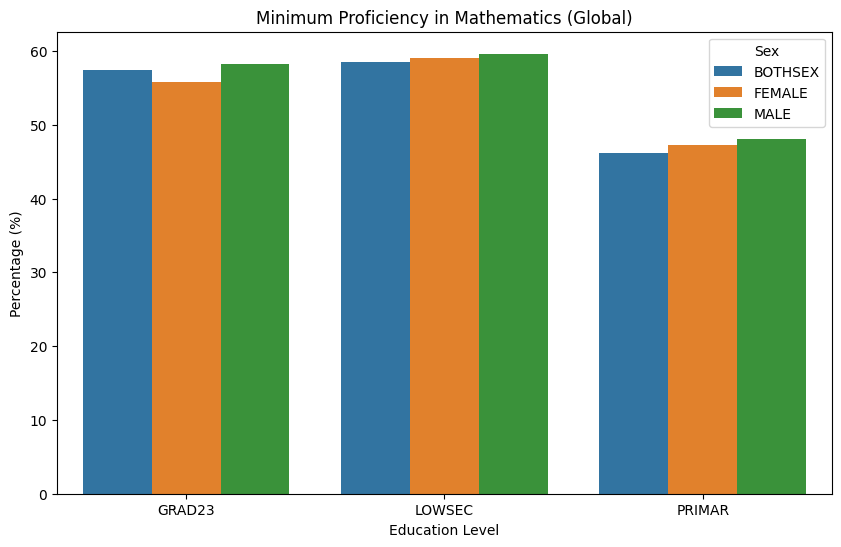

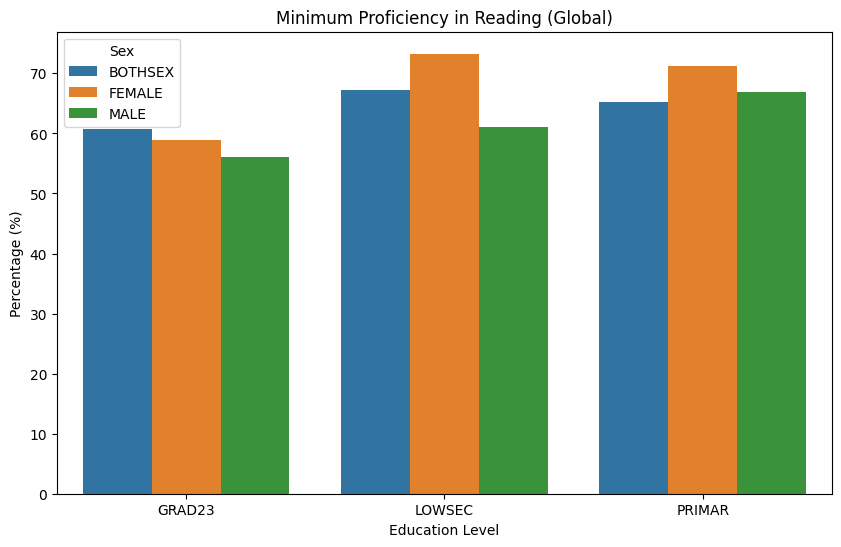

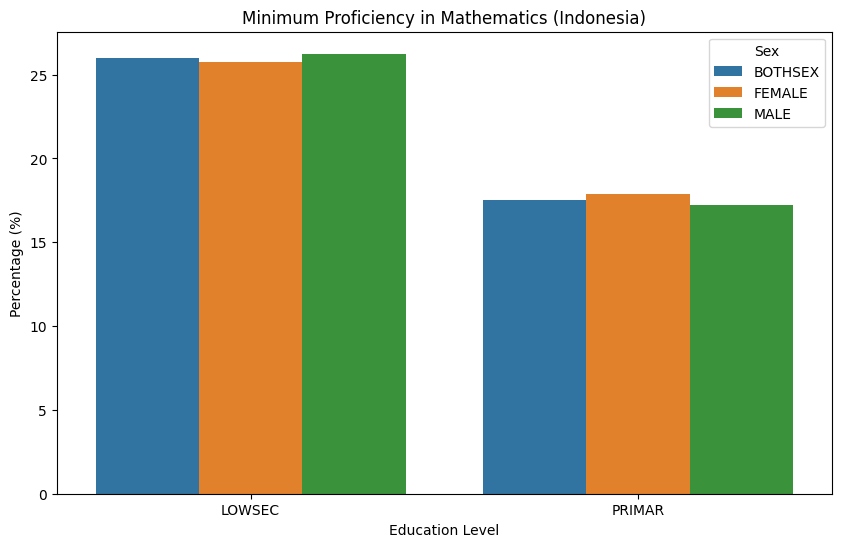

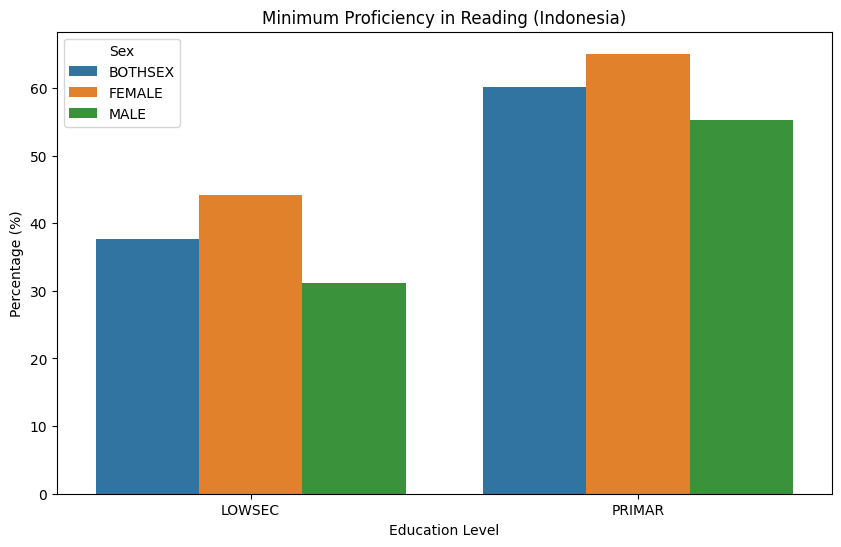

In [35]:
# Filter data untuk Matematika dan Membaca
data_math = data_411[data_411['Type of skill'] == 'SKILL_MATH']
data_reading = data_411[data_411['Type of skill'] == 'SKILL_READ']

# Filter data untuk Indonesia
data_math_indonesia = data_411_indonesia[data_411_indonesia['Type of skill'] == 'SKILL_MATH']
data_reading_indonesia = data_411_indonesia[data_411_indonesia['Type of skill'] == 'SKILL_READ']

# Grouping data berdasarkan tingkat pendidikan dan jenis kelamin
grouped_math = data_math.groupby(['Education level', 'Sex'])['Value'].mean().reset_index()
grouped_reading = data_reading.groupby(['Education level', 'Sex'])['Value'].mean().reset_index()

grouped_math_indonesia = data_math_indonesia.groupby(['Education level', 'Sex'])['Value'].mean().reset_index()
grouped_reading_indonesia = data_reading_indonesia.groupby(['Education level', 'Sex'])['Value'].mean().reset_index()

# Visualisasi Bar Chart untuk Matematika (Global)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_math, x='Education level', y='Value', hue='Sex')
plt.title('Minimum Proficiency in Mathematics (Global)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.show()

# Visualisasi Bar Chart untuk Membaca (Global)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_reading, x='Education level', y='Value', hue='Sex')
plt.title('Minimum Proficiency in Reading (Global)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.show()

# Visualisasi Bar Chart untuk Matematika (Indonesia)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_math_indonesia, x='Education level', y='Value', hue='Sex')
plt.title('Minimum Proficiency in Mathematics (Indonesia)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.show()

# Visualisasi Bar Chart untuk Membaca (Indonesia)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_reading_indonesia, x='Education level', y='Value', hue='Sex')
plt.title('Minimum Proficiency in Reading (Indonesia)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.show()

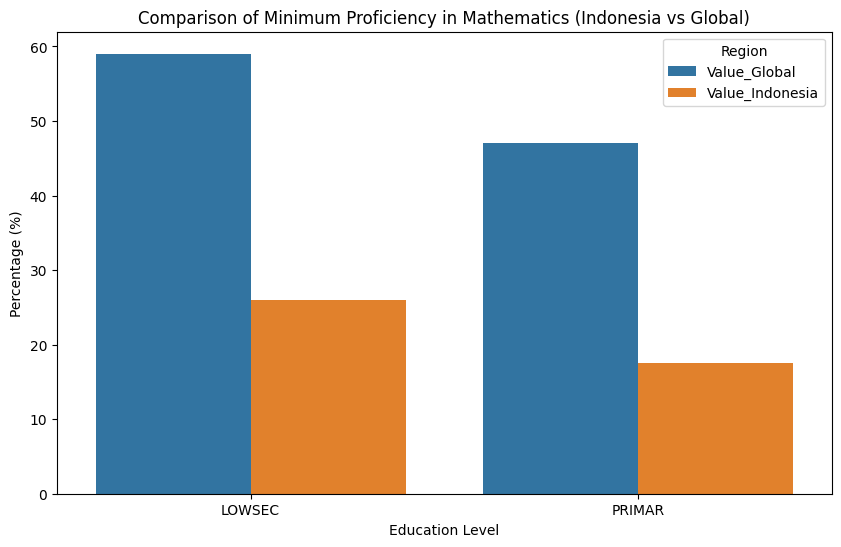

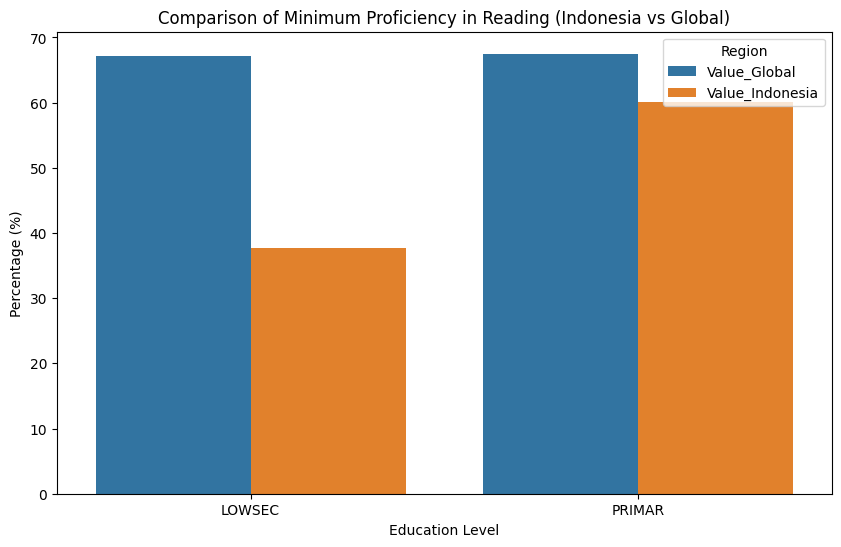

In [36]:
# Grouping data global untuk rata-rata MPL
global_avg_math = data_math.groupby('Education level')['Value'].mean().reset_index()
global_avg_reading = data_reading.groupby('Education level')['Value'].mean().reset_index()

# Grouping data Indonesia untuk rata-rata MPL
indonesia_avg_math = data_math_indonesia.groupby('Education level')['Value'].mean().reset_index()
indonesia_avg_reading = data_reading_indonesia.groupby('Education level')['Value'].mean().reset_index()

# Gabungkan data global dan Indonesia untuk visualisasi perbandingan
comparison_math = pd.merge(global_avg_math, indonesia_avg_math, on='Education level', suffixes=('_Global', '_Indonesia'))
comparison_reading = pd.merge(global_avg_reading, indonesia_avg_reading, on='Education level', suffixes=('_Global', '_Indonesia'))

# Visualisasi Perbandingan MPL untuk Matematika
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_math.melt(id_vars='Education level', var_name='Region', value_name='Value'), x='Education level', y='Value', hue='Region')
plt.title('Comparison of Minimum Proficiency in Mathematics (Indonesia vs Global)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.show()

# Visualisasi Perbandingan MPL untuk Membaca
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_reading.melt(id_vars='Education level', var_name='Region', value_name='Value'), x='Education level', y='Value', hue='Region')
plt.title('Comparison of Minimum Proficiency in Reading (Indonesia vs Global)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.show()